In [1]:
# Based on 
# - Task: https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
# - https://www.kaggle.com/hemanth346/bbc-classification
# - https://www.kaggle.com/skaistule/text-classification-clustering

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

import os # file processing

In [3]:
data_dir = "../common-data/bbc"

# Checking the data
for root, dirs, files in os.walk(data_dir, topdown=False):
   #for name in files:
   #   print(os.path.join(root, name))
    
   # Printing just the dirs
   for name in dirs:
      print(os.path.join(root, name))

../common-data/bbc/entertainment
../common-data/bbc/business
../common-data/bbc/sport
../common-data/bbc/politics
../common-data/bbc/tech


In [4]:
# Load data into dictionary
from collections import defaultdict
frame = defaultdict(list)

for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        frame['category'].append(os.path.basename(dirname))
        
        name = os.path.splitext(filename)[0]
        frame['document_id'].append(name)

        path = os.path.join(dirname, filename)
        # throwed UnicodeDecodeError without encoding
        # Googled "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3" - https://stackoverflow.com/a/55391198/7445772
        with open(path ,'r', encoding= 'unicode_escape') as file:
            frame['text'].append(file.read())

In [5]:
# We can convert the dictionary into data frame
df = pd.DataFrame.from_dict(frame)

# See a sample
df.head()

,category,document_id,text
0,bbc,README,Consists of 2225 documents from the BBC news w...
1,entertainment,289,Musicians to tackle US red tape\n\nMusicians' ...
2,entertainment,262,"U2's desire to be number one\n\nU2, who have w..."
3,entertainment,276,Rocker Doherty in on-stage fight\n\nRock singe...
4,entertainment,060,Snicket tops US box office chart\n\nThe film a...


In [6]:
df['category'].value_counts()
# bbc is data_dir with just readme file, we can drop it and proceed

sport            511
business         510
politics         417
tech             401
entertainment    386
bbc                1
Name: category, dtype: int64

In [7]:
# Removing the readme (category bbc) 
df.drop(0, axis=0, inplace=True)

In [8]:
# Checking: readme (category bbc) is removed
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [9]:
# Assuming first line has title, add a column with title and the rest as body
text = df["text"].str.split("\n", n = 1, expand = True) 

df["title"] =  text[0]
df['story'] = text[1]

# See a sample
df.head()

,category,document_id,text,title,story
1,entertainment,289,Musicians to tackle US red tape\n\nMusicians' ...,Musicians to tackle US red tape,\nMusicians' groups are to tackle US visa regu...
2,entertainment,262,"U2's desire to be number one\n\nU2, who have w...",U2's desire to be number one,"\nU2, who have won three prestigious Grammy Aw..."
3,entertainment,276,Rocker Doherty in on-stage fight\n\nRock singe...,Rocker Doherty in on-stage fight,\nRock singer Pete Doherty has been involved i...
4,entertainment,060,Snicket tops US box office chart\n\nThe film a...,Snicket tops US box office chart,\nThe film adaptation of Lemony Snicket novels...
5,entertainment,074,Ocean's Twelve raids box office\n\nOcean's Twe...,Ocean's Twelve raids box office,"\nOcean's Twelve, the crime caper sequel starr..."


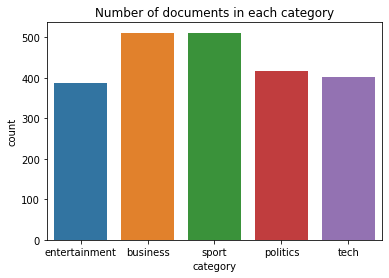

In [10]:
# Seeing content distribution by category
sns.countplot(df.category)
plt.title('Number of documents in each category')
plt.show()

In [11]:
import random

# Making a sample of random titles which will be used to verify changes
samples = random.sample(range(len(df.title)), 10)
for idx in samples:
    print(df.title[idx])
    print('-'*36)

Fockers retain film chart crown
------------------------------------
Market unfazed by Aurora setback
------------------------------------
Ailing EuroDisney vows turnaround
------------------------------------
REM concerts blighted by illness
------------------------------------
GE sees 'excellent' world economy
------------------------------------
Ministers deny care sums 'wrong'
------------------------------------
The Sound of Music is coming home
------------------------------------
Gallery unveils interactive tree
------------------------------------
Double eviction from Big Brother
------------------------------------
US firm pulls out of Iraq
------------------------------------


In [12]:
import re
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def clean_text(text):
    # decontraction : https://stackoverflow.com/a/47091490/7445772
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    
    # remove line breaks \r \n \t remove from string 
    text = text.replace('\\r', ' ')
    text = text.replace('\\"', ' ')
    text = text.replace('\\t', ' ')
    text = text.replace('\\n', ' ')

    # remove stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords)

    # remove special chars
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    text = text.lower()
    return text

In [13]:
# Clean titles
processed_titles = []
for title in df['title'].values:
    processed_title = clean_text(title)
    processed_titles.append(processed_title)

In [14]:
# titles after processing
for idx in samples:
    print(processed_titles[idx])
    print('-'*36)

top gig award scissor sisters
------------------------------------
profits stall china lenovo
------------------------------------
eu probe alitalia istate aid 
------------------------------------
charity single quake relief
------------------------------------
five million germans work
------------------------------------
tories unveil quango blitz plans
------------------------------------
lasting influence legend charles
------------------------------------
mutant book wins guardian prize
------------------------------------
csi shows give unrealistic view 
------------------------------------
mcdonald boss bell dies aged 44
------------------------------------


In [15]:
# For content (title), it has to be converted to efficient/ vector representation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5)
title_tfidf = vectorizer.fit_transform(processed_titles)

In [16]:
# For label (categorical), it has to be converted to one hot encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['le_label'] = le.fit_transform(df['category'])

# Also keep it handly as a list
category_onehot = (df['le_label'].values)

# Check dataframe just to be safe
df.tail()

,category,document_id,text,title,story,le_label
2221,tech,086,Warning over Windows Word files\n\nWriting a M...,Warning over Windows Word files,\nWriting a Microsoft Word document can be a d...,4
2222,tech,253,Fast lifts rise into record books\n\nTwo high-...,Fast lifts rise into record books,\nTwo high-speed lifts at the world's tallest ...,4
2223,tech,247,Nintendo adds media playing to DS\n\nNintendo ...,Nintendo adds media playing to DS,\nNintendo is releasing an adapter for its DS ...,4
2224,tech,290,Fast moving phone viruses appear\n\nSecurity f...,Fast moving phone viruses appear,\nSecurity firms are warning about several mob...,4
2225,tech,284,Hacker threat to Apple's iTunes\n\nUsers of Ap...,Hacker threat to Apple's iTunes,\nUsers of Apple's music jukebox iTunes need t...,4


In [17]:
# Training a classifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import linear_model

In [18]:
X = title_tfidf
y = category_onehot

In [19]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=9)



In [20]:
# Train a logistic model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
LR_prediction = model.predict(X_test)

In [21]:
# Statistics
print(f'Using Logistic regression : {accuracy_score(LR_prediction, y_test)}')

Using Logistic regression : 0.7146067415730337
